In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm, skew

In [4]:
df=pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.nunique()[df.nunique() < 10]


MSZoning         5
Street           2
Alley            2
LotShape         4
LandContour      4
Utilities        2
LotConfig        5
LandSlope        3
Condition1       9
Condition2       8
BldgType         5
HouseStyle       8
OverallCond      9
RoofStyle        6
RoofMatl         8
MasVnrType       3
ExterQual        4
ExterCond        5
Foundation       6
BsmtQual         4
BsmtCond         4
BsmtExposure     4
BsmtFinType1     6
BsmtFinType2     6
Heating          6
HeatingQC        5
CentralAir       2
Electrical       5
BsmtFullBath     4
BsmtHalfBath     3
FullBath         4
HalfBath         3
BedroomAbvGr     8
KitchenAbvGr     4
KitchenQual      4
Functional       7
Fireplaces       4
FireplaceQu      5
GarageType       6
GarageFinish     3
GarageCars       5
GarageQual       5
GarageCond       5
PavedDrive       3
PoolArea         8
PoolQC           3
Fence            4
MiscFeature      4
YrSold           5
SaleType         9
SaleCondition    6
dtype: int64

In [9]:
low_card_cols = df.nunique()[df.nunique() < 10].index.tolist()
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [11]:

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [12]:

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [13]:
obj_cols = df.select_dtypes(include=['object', 'string']).columns

numeric_like_cols = []

for col in obj_cols:
    try:
        converted = pd.to_numeric(df[col], errors='coerce')
        
        percent_numeric = converted.notna().mean()
        
        if percent_numeric > 0.9: 
            numeric_like_cols.append(col)
    except:
        pass  

In [14]:
X=df.iloc[:,1:-1]
Y=df.iloc[:,-1]

#  Split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=20,random_state=42)

In [16]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_10295/3453550780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


In [17]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='SalePrice', data=df, palette='hsv');

/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_10295/448740750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SalePrice', data=df, palette='hsv');


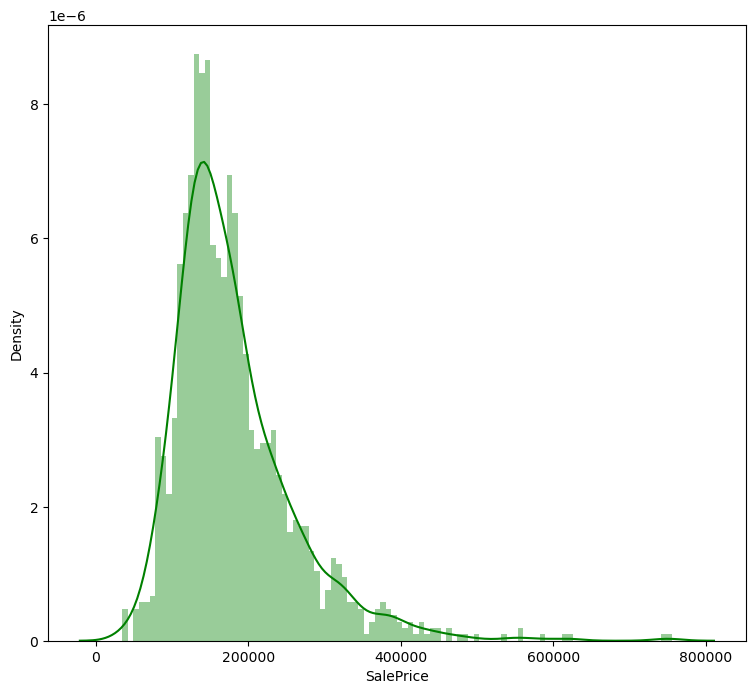

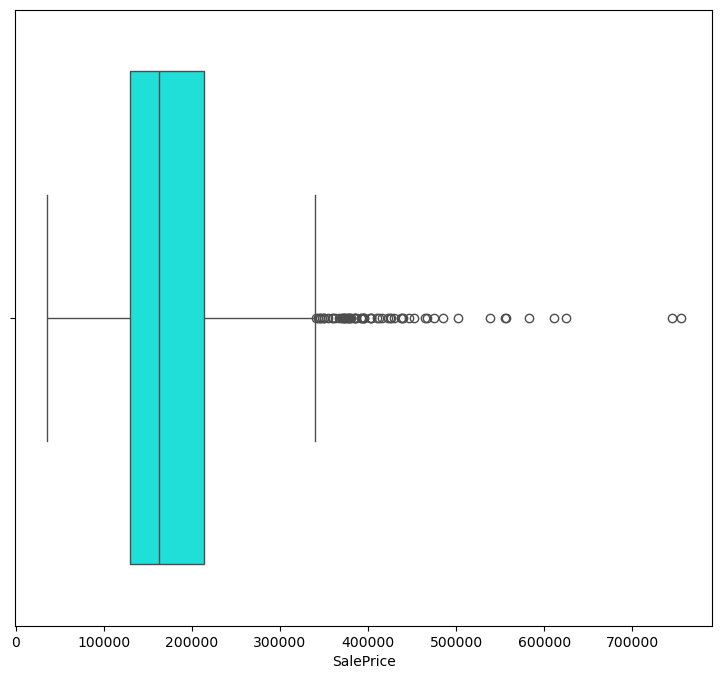

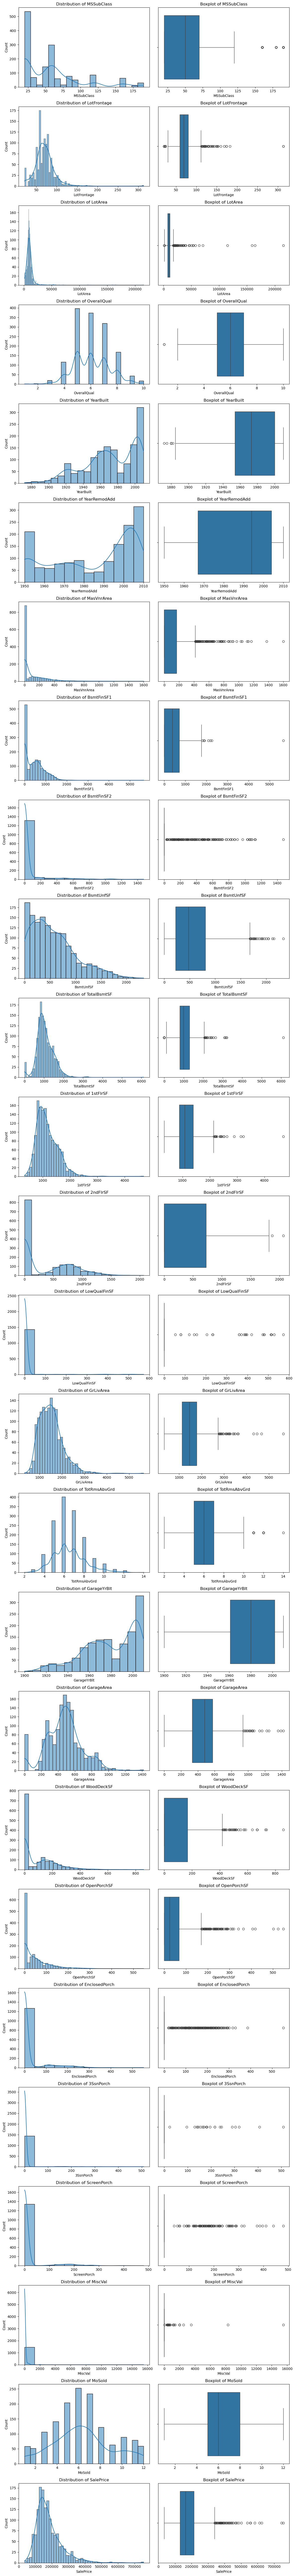

In [18]:
# Select numerical columns
df.drop(columns=['Id'], inplace=True)
numerical_data = df.select_dtypes(include=['float64', 'int64'])
n_cols = len(numerical_data.columns)
n_rows = n_cols

# Adjust figsize dynamically
plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numerical_data.columns):
    # Create a subplot for the distribution plot
    plt.subplot(n_rows, 2, 2 * i + 1)
    # sns.histplot(numerical_data[col], kde=True, bins=30)  # Updated to use sns.histplot
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
     # Create a subplot for the boxplot
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Boxplot of {col}')

# Adjustjustment on  layout to prevent overlap
plt.tight_layout()
plt.show()

In [19]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)



 mu = 180921.20 and sigma = 79415.29



<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_10295/2651681603.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],


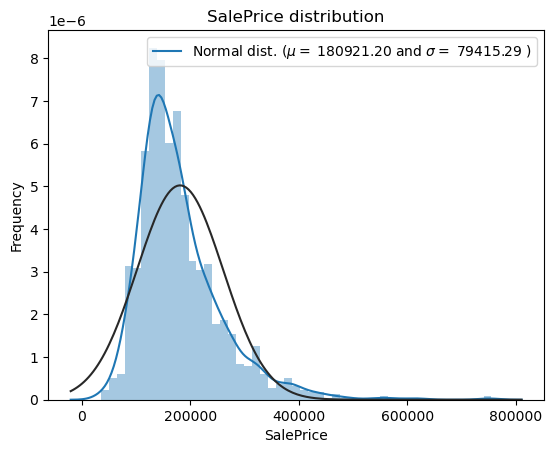

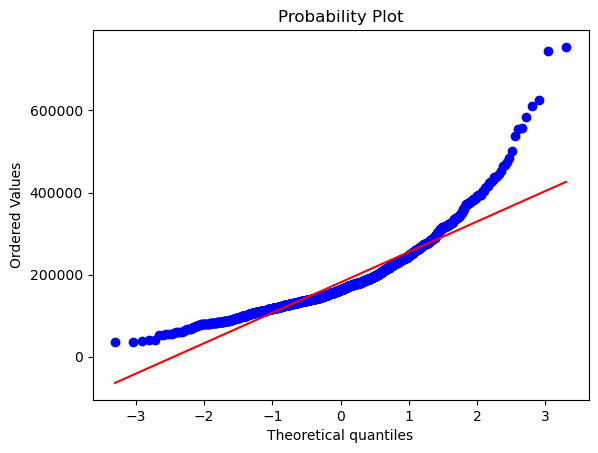

In [20]:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_10295/602381531.py:25: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f'{col} Dist\n$\mu$={mu:.2f}, $\sigma$={sigma:.2f}')
/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_10295/602381531.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'{col} Dist\n$\mu$={mu:.2f}, $\sigma$={sigma:.2f}')
/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_10295/602381531.py:27: SyntaxWarning: invalid escape sequence '\m'
  plt.legend([f'Normal dist. ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})'])
/var/folders/

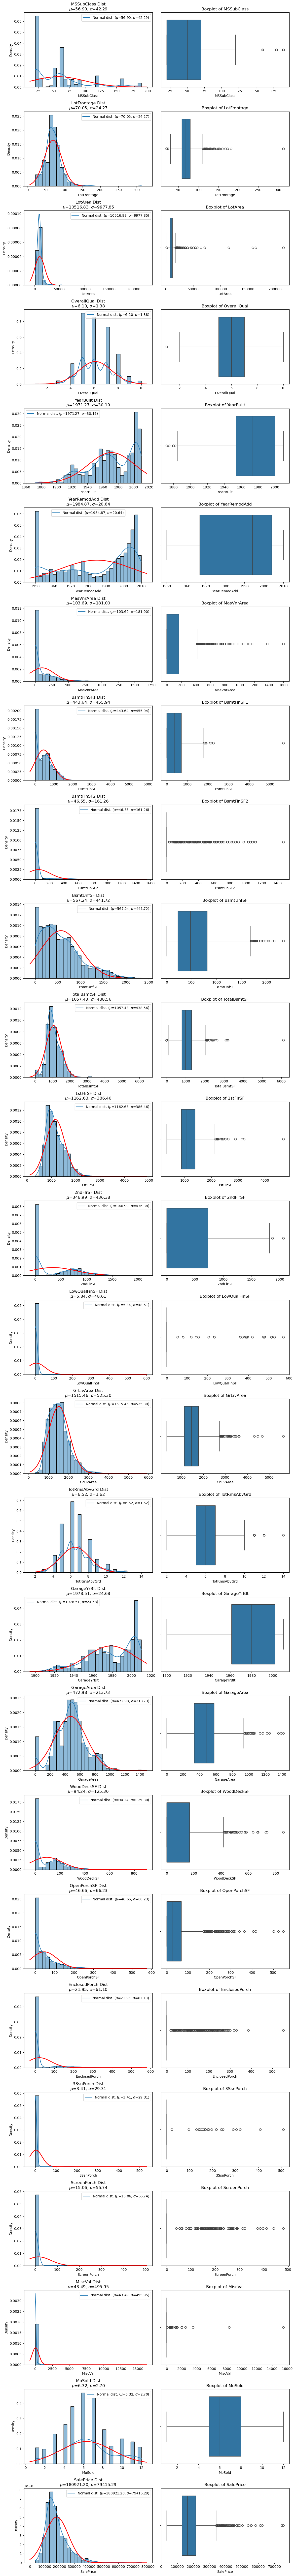

In [21]:
# df.drop(columns=['Id'], inplace=True)
# Select numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])
n_cols = len(numerical_data.columns)
n_rows = n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numerical_data.columns):
    data = numerical_data[col].dropna()

    # Fit a normal distribution to the data
    mu, sigma = norm.fit(data)

    # Distribution plot with Gaussian fit
    plt.subplot(n_rows, 2, 2 * i + 1)
    sns.histplot(data, kde=True, stat="density", bins=30)
    
    # Overlay the normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'r', linewidth=2)
    
    plt.title(f'{col} Dist\n$\mu$={mu:.2f}, $\sigma$={sigma:.2f}')
    plt.ylabel('Density')
    plt.legend([f'Normal dist. ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})'])

    # Boxplot
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.boxplot(x=data)
    plt.title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

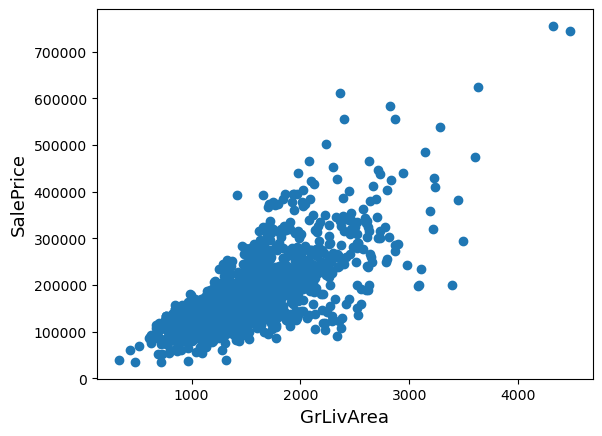

In [22]:

df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)


fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

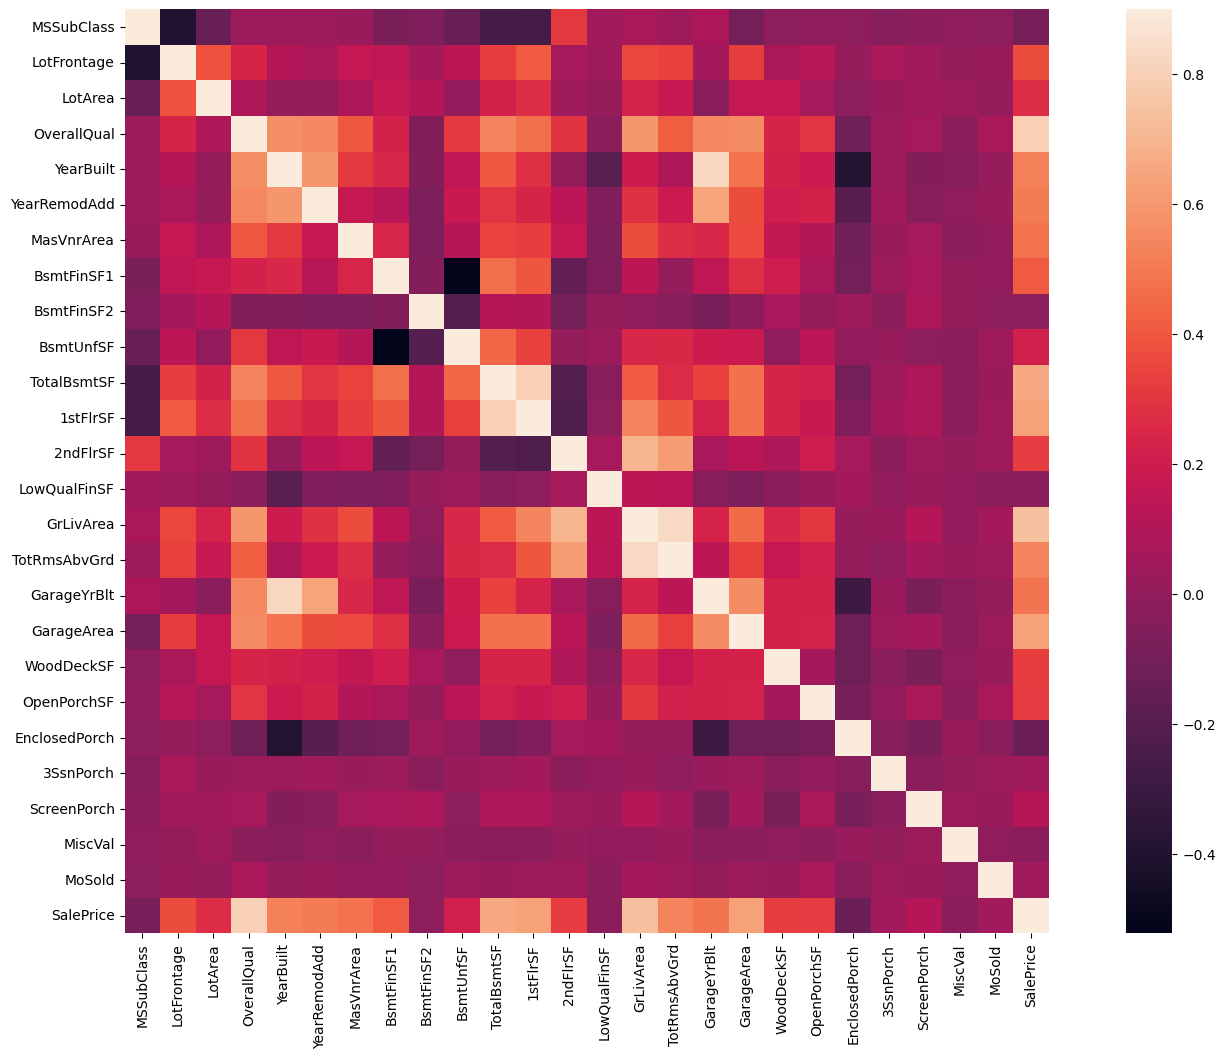

In [23]:
# Use only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
corrmat = numerical_df.corr()
plt.subplots(figsize=(20,12))

sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [24]:
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
dt=DecisionTreeRegressor()
svr=SVR()
ada=AdaBoostRegressor()

In [25]:
df.shape

(1458, 230)